## **SPOTIFY HIT PREDICTOR: Analyzing Song Popularity**

**Project 11: Rocknomics**

Group 4:
- Hanna Luise Baeuchle (53279)
- David Graça Martins (26133)
- Nicklas Mundt (53766)
- Monica Schirripa (55701)
- Laura Weil (53012)

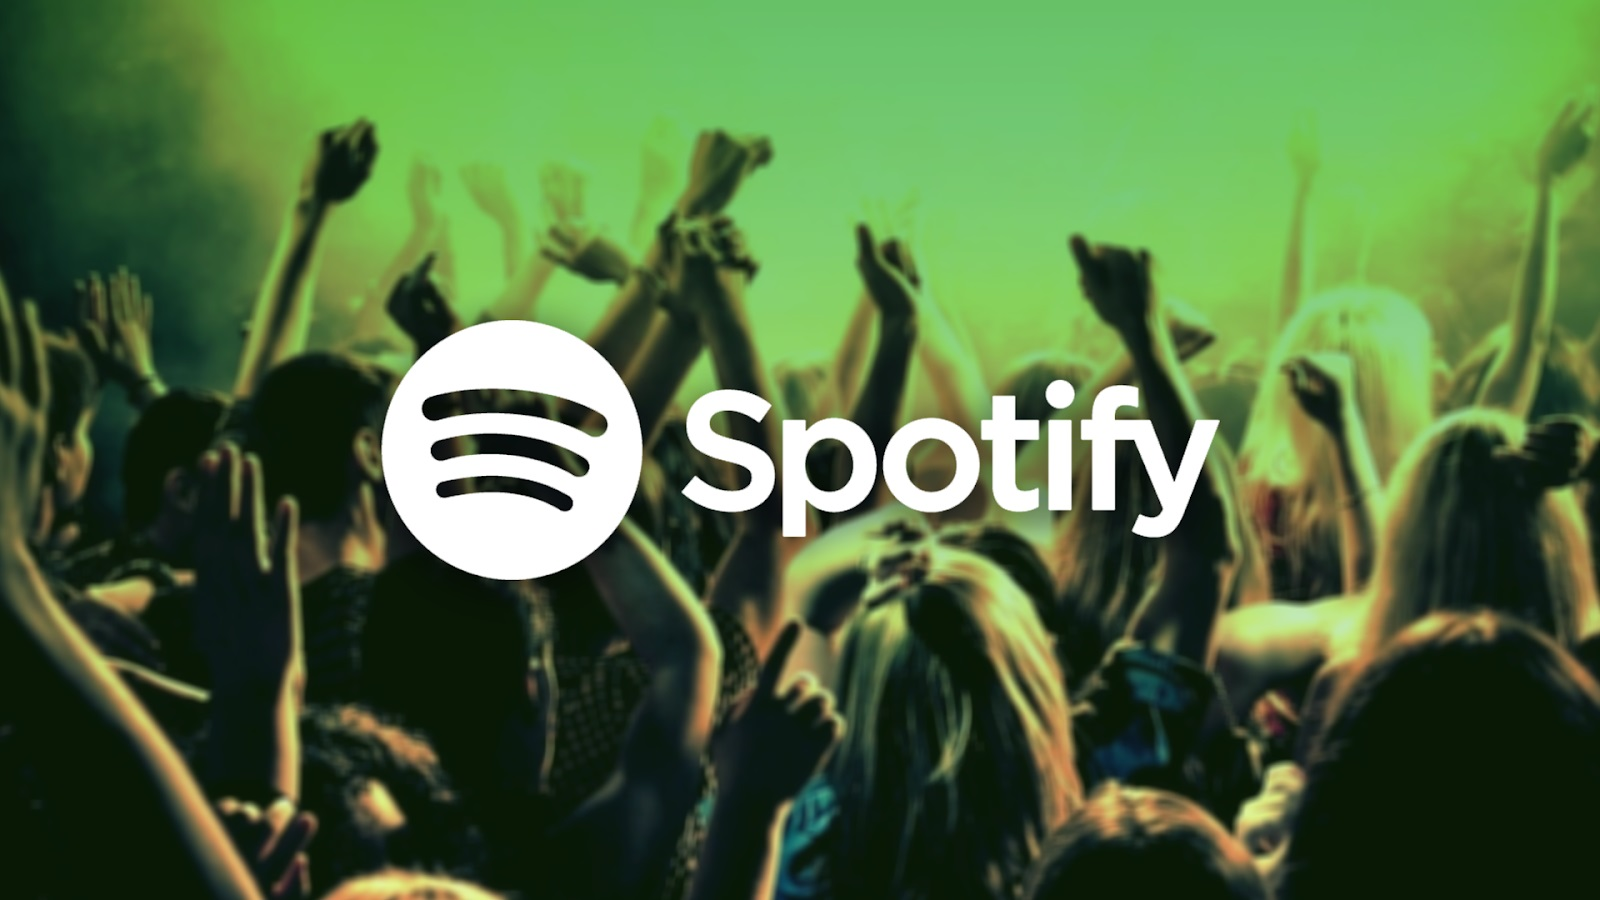

## INTRODUCTION

**BUSINESS CONTEXT**

The music industry has experienced a remarkable metamorphosis in recent years, propelled primarily by the rise of digital streaming platforms such as **Spotify**, Apple Music, and Amazon Music. These platforms have revolutionized the way artists approach music creation, while generating an immense volume of data related to song attributes, album characteristics, and track features. 
Harnessing this data for actionable insights has become crucial for various stakeholders in the music industry, including artists, record labels, and music recommendation services, as they strive to adapt to the rapidly evolving landscape and address the diverse preferences of listeners.

Given the highly competitive nature of the music market, artists and record labels face constant challenges in capturing the attention of listeners and achieving commercial success. As traditional promotion methods like radio play and physical album sales decline, the importance of understanding and adapting to the dynamics of digital streaming platforms has become paramount. The increasing prominence of data-driven decision making in the music industry calls for effective approaches to analyzing the wealth of available data in order to stay relevant and succeed in this new environment.

---------------------------------------------------------

**MAIN OBJECTIVE**

In this project, our primary objective is to explore and analyze a large dataset of songs collected from the Spotify Web API, encompassing the period between 1921 and 2020. By employing machine learning techniques, we aim to develop a **predictive model** capable of identifying songs that are likely to become popular and understanding the key factors that contribute to their success. Such a model can potentially be used by artists, producers, and record labels to better tailor their work to the tastes and preferences of their target audience, ultimately increasing the chances of a song's success in the highly competitive music market.

The importance of this project lies in its potential to provide a deeper understanding of the factors that contribute to a song or artist's success, as well as to offer valuable insights into the ever-changing landscape of the music industry. Moreover, the findings of this project can serve as a basis for further research and development in the realm of music analytics, paving the way for more advanced and personalized music experiences for users across the globe.

The dataset includes more than 175,000 songs, and contains information about song attributes, album characteristics, and track features, as well as metadata such as the artist's name and the year of release. We will preprocess and clean the dataset, perform feature engineering to extract meaningful information from the input features, and develop a machine learning model that can accurately predict a song's popularity.

To achieve this goal, we will evaluate and compare different machine learning algorithms and techniques, such as regression models, tree-based models, and neural networks, and tune the model using techniques such as cross-validation and hyperparameter optimization. We will also explore the key factors that contribute to a song's popularity, using feature importance analysis and visualization techniques to gain insights into the relationships between different input features and the output variable.To achieve this goal, we will evaluate and compare different machine learning algorithms and techniques, such as regression models, tree-based models, and neural networks, and tune the model using techniques such as cross-validation and hyperparameter optimization. We will also explore the key factors that contribute to a song's popularity, using feature importance analysis and visualization techniques to gain insights into the relationships between different input features and the output variable.

This Machine Learning project can help to:
 - Develop predictive models that analyze the characteristics of popular songs and use them to predict the success of new or upcoming songs.
 - Identify the most important factors that contribute to the success of a song, such as its duration, and use this information to guide the creation of new music.
 - Personalize music recommendations for individual listeners based on their listening history, preferences, and behaviors, thereby increasing the chances that they will discover and enjoy new songs.
    

<div class="alert alert-danger" role="alert">
Need to add the metric we will optimize and why

## Strategy

- Exploratory Data Analysis
- Dimensionality Reduction
- Preprocessing Pipline
- Models:
    1. Linear Regression
    2. Regression Tree


In [2]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('figure', figsize=(15, 6))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## EDA - ALBUMS

**Data Dictionary**

The following data dictionary provides an overview of the variables found in the Spotify album dataset. This dataset contains information about various albums, their associated artists, and additional details that can help us analyze trends and patterns in the music industry.

* **album_type** : The type of the album (e.g., 'single', 'album', 'compilation').

* **artist_id** : A unique identifier for the artist associated with the album.

* **available_markets** : A list of market codes (country codes) where the album is available for streaming or purchase.

* **eternal_urls** : A link to the Spotify Web API endpoint containing full details about the album.

* **href** : A link to the Spotify Web API endpoint containing full details about the album.

* **id** : A unique identifier for the album.

* **images** : A list of dictionaries containing URLs to album cover images, along with image dimensions (width and height).

* **name** : The name of the album.

* **release_date** : The release date of the album, usually in the format 'YYYY-MM-DD'.

* **release_date_precision** : The precision level of the release date (e.g., 'year', 'month', 'day'), indicating the accuracy of the provided release date.

* **total_tracks** : The total number of tracks in the album.

* **track_id** : A unique identifier for the track associated with the album.

* **track_name_prev** : The name of the previous track in the album or the previous version of the track (depending on the context in your dataset).

* **uri** : A link to the Spotify Web API endpoint containing full details about the album.

* **type** : The object type, which should be 'album' for this dataset, indicating that the data entry is related to an album.

In [3]:
albums = pd.read_csv('SpotGenTrack/Data Sources/spotify_albums.csv', index_col = 0)

In [4]:
albums

album_type               artist_id  \
0         single  3DiDSECUqqY1AuBP8qtaIa   
1          album  6s1pCNXcbdtQJlsnM1hRIA   
2         single  5YjfNaHq05WrwldRe1QSBc   
3         single  2G9Vc16JCpnZmK4uGH46Fa   
4         single  2dwM9OcE4c3Ph1UBINSodx   
...          ...                     ...   
75506      album  0S7CCsKpXJ8e1dIstizHw5   
75507      album  73Vk4dL8kYkbRJxWJDq1wL   
75508      album  3yW6jTzGjHUUkLvLkjLOVn   
75509      album  4iudEcmuPlYNdbP3e1bdn1   
75510      album  023YMawCG3OvACmRjWxLWC   

                                       available_markets  \
0      ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   
1      ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   
2      ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   
3      ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   
4      ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   
...                                                  ...   
75506  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   
75507  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   
75508                                       ['AU', 'NZ']   
75509  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   
75510  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...   

                                           external_urls  \
0      {'spotify': 'https://open.spotify.com/album/1g...   
1      {'spotify': 'https://open.spotify.com/album/4K...   
2      {'spotify': 'https://open.spotify.com/album/7n...   
3      {'spotify': 'https://open.spotify.com/album/6p...   
4      {'spotify': 'https://open.spotify.com/album/1X...   
...                                                  ...   
75506  {'spotify': 'https://open.spotify.com/album/4Z...   
75507  {'spotify': 'https://open.spotify.com/album/4D...   
75508  {'spotify': 'https://open.spotify.com/album/4P...   
75509  {'spotify': 'https://open.spotify.com/album/51...   
75510  {'spotify': 'https://open.spotify.com/album/7H...   

                                                    href  \
0      https://api.spotify.com/v1/albums/1gAM7M4rBwEb...   
1      https://api.spotify.com/v1/albums/4KfJZV7WfolY...   
2      https://api.spotify.com/v1/albums/7nLYY7uAVUb5...   
3      https://api.spotify.com/v1/albums/6p20Rt4x2Qn5...   
4      https://api.spotify.com/v1/albums/1XeoOqC1q7U2...   
...                                                  ...   
75506  https://api.spotify.com/v1/albums/4ZbkQn6amf1t...   
75507  https://api.spotify.com/v1/albums/4DifRQy4Dyey...   
75508  https://api.spotify.com/v1/albums/4PXy3cBCNeY0...   
75509  https://api.spotify.com/v1/albums/511p6iaCuK8S...   
75510  https://api.spotify.com/v1/albums/7H3Bgvb3hs4v...   

                           id  \
0      1gAM7M4rBwEbSPeAQR2nx1   
1      4KfJZV7WfolYlxBzOTo66s   
2      7nLYY7uAVUb57kpd7tZxnS   
3      6p20Rt4x2Qn5mUMRi1s6pj   
4      1XeoOqC1q7U2iyLEQJ64cu   
...                       ...   
75506  4ZbkQn6amf1t3a202zen2u   
75507  4DifRQy4Dyey9NSS7ywnEx   
75508  4PXy3cBCNeY0ZVKTOGi9Cw   
75509  511p6iaCuK8Sr0BYdpcfkq   
75510  7H3Bgvb3hs4vvLwccHDRlr   

                                                  images  \
0      [{'height': 640, 'url': 'https://i.scdn.co/ima...   
1      [{'height': 640, 'url': 'https://i.scdn.co/ima...   
2      [{'height': 640, 'url': 'https://i.scdn.co/ima...   
3      [{'height': 640, 'url': 'https://i.scdn.co/ima...   
4      [{'height': 640, 'url': 'https://i.scdn.co/ima...   
...                                                  ...   
75506  [{'height': 640, 'url': 'https://i.scdn.co/ima...   
75507  [{'height': 640, 'url': 'https://i.scdn.co/ima...   
75508  [{'height': 640, 'url': 'https://i.scdn.co/ima...   
75509  [{'height': 640, 'url': 'https://i.scdn.co/ima...   
75510  [{'height': 640, 'url': 'https://i.scdn.co/ima...   

                                                    name release_date  \
0                                  If I Ain't Got You EP   2019-02-08   
1      Shostakovich Symphony No.5 - Four Romances 

In [5]:
albums.dtypes

album_type                object
artist_id                 object
available_markets         object
external_urls             object
href                      object
id                        object
images                    object
name                      object
release_date              object
release_date_precision    object
total_tracks               int64
track_id                  object
track_name_prev           object
uri                       object
type                      object
dtype: object

In [6]:
albums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75511 entries, 0 to 75510
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   album_type              75511 non-null  object
 1   artist_id               75511 non-null  object
 2   available_markets       75511 non-null  object
 3   external_urls           75511 non-null  object
 4   href                    75511 non-null  object
 5   id                      75511 non-null  object
 6   images                  75511 non-null  object
 7   name                    75511 non-null  object
 8   release_date            75511 non-null  object
 9   release_date_precision  75511 non-null  object
 10  total_tracks            75511 non-null  int64 
 11  track_id                75511 non-null  object
 12  track_name_prev         75511 non-null  object
 13  uri                     75511 non-null  object
 14  type                    75511 non-null  object
dtypes:

In [7]:
albums.describe()

total_tracks
count  75511.000000
mean       8.235807
std       11.669811
min        1.000000
25%        1.000000
50%        5.000000
75%       12.000000
max      977.000000

In [8]:
#check for missing values
albums.isnull().sum()

album_type                0
artist_id                 0
available_markets         0
external_urls             0
href                      0
id                        0
images                    0
name                      0
release_date              0
release_date_precision    0
total_tracks              0
track_id                  0
track_name_prev           0
uri                       0
type                      0
dtype: int64

In [9]:
#check for duplicated rows
albums.duplicated().unique()

array([False])

In [10]:
#datetime
albums['release_date']= pd.to_datetime(albums['release_date'])

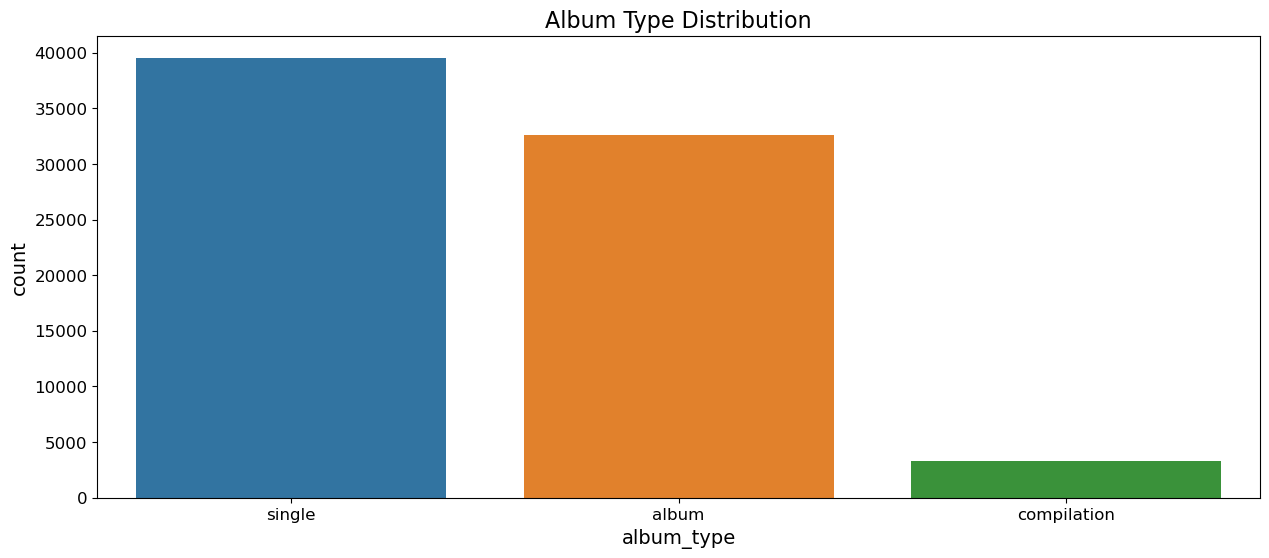

In [11]:
#album type distribution
sns.countplot(x='album_type', data=albums)
plt.title('Album Type Distribution', fontsize=16)
plt.show()

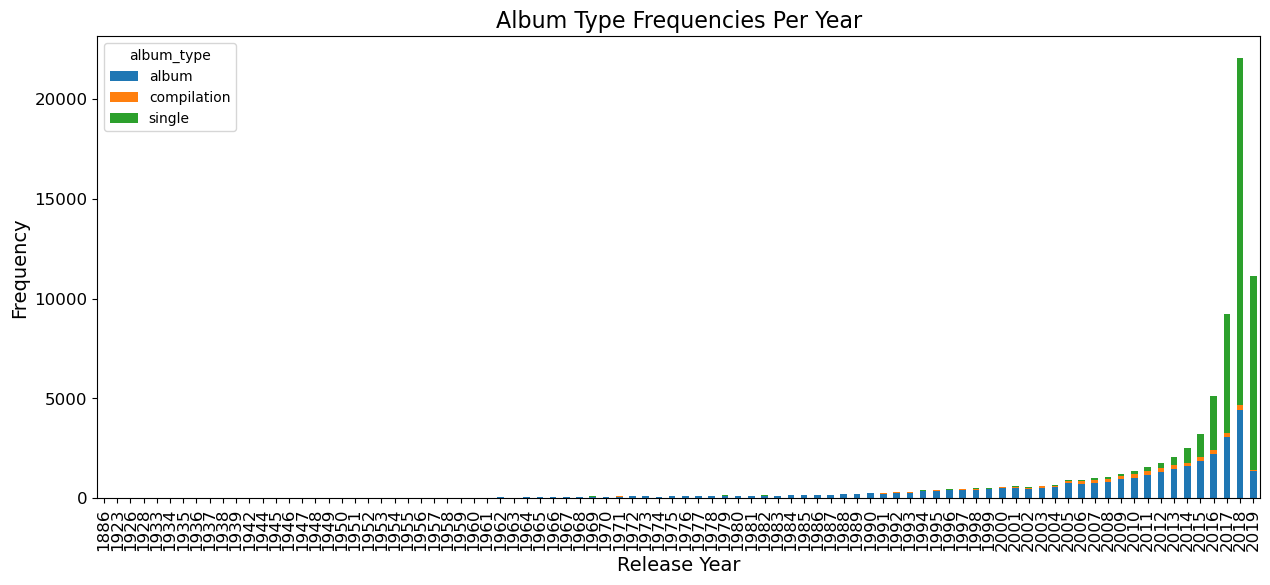

In [12]:
#album type distribution per year

# Convert 'release_date' to datetime and extract the year
albums['release_year'] = pd.to_datetime(albums['release_date']).dt.year

# Calculate album type frequencies per year
yearly_album_type_counts = albums.groupby(['release_year', 'album_type']).size().reset_index(name='count')

# Pivot the yearly_album_type_counts dataframe to create a table suitable for plotting
yearly_album_type_pivot = yearly_album_type_counts.pivot_table(index='release_year', columns='album_type', values='count', fill_value=0)

# Plot the stacked bar plot using pandas plot function
yearly_album_type_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Album Type Frequencies Per Year', fontsize=16)
plt.show()

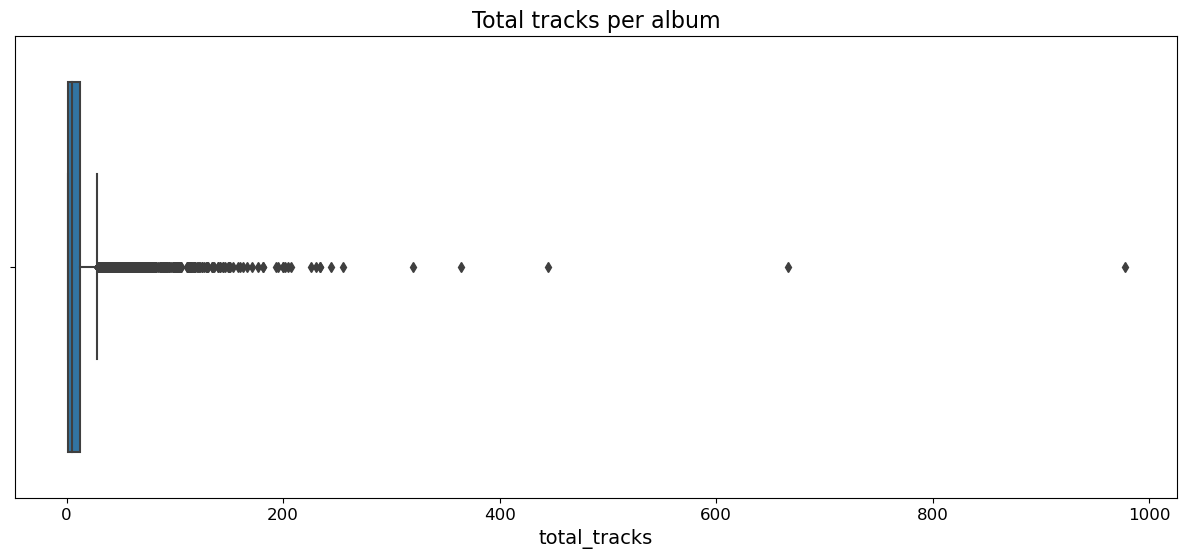

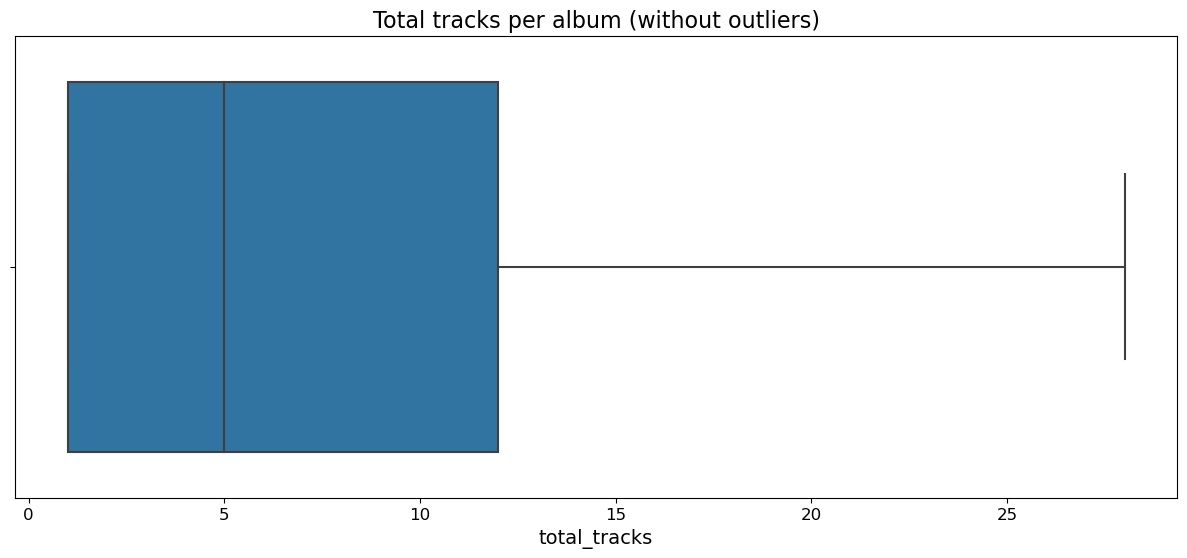

In [13]:
sns.boxplot(data=albums, x='total_tracks')
plt.title('Total tracks per album', fontsize=16)
plt.show()
sns.boxplot(data=albums, x='total_tracks', showfliers=False)
plt.title('Total tracks per album (without outliers)', fontsize=16)
plt.show()

## EDA - ARTISTS

**Data Dictionary**

The following data dictionary provides an overview of the variables found in the Spotify artist dataset. This dataset contains information about various artists, their popularity, followers, genres, and associated tracks,

* **artist_popularity** : the scale of popularity of the artist - [0 -100] where 100 is the most popular.

* **followers** : total amount of the artist's spotify followers

* **genres** : the name of the gender(s) associated with that artist

* **id** : unique identifier for each artist

* **name** : artist name

* **track_id** : unique identifier for the artist's track

* **track_name_prev** : The name of the previous track in the album or the previous version of the track (depending on the context in your dataset).

* **type** : "artist"

In [14]:
artists = pd.read_csv('SpotGenTrack/Data Sources/spotify_artists.csv', index_col = 0)

In [15]:
artists.head()

artist_popularity  followers  \
0                 44      23230   
1                 22        313   
2                 26       1596   
3                 31        149   
4                 21         11   

                                              genres                      id  \
0  ['sertanejo', 'sertanejo pop', 'sertanejo trad...  4mGnpjhqgx4RUdsIJiURdo   
1                                                 []  1dLnVku4VQUOLswwDFvRc9   
2                                ['danish pop rock']  6YVY310fjfUzKi8hiqR7iK   
3                             ['uk alternative pop']  2VElyouiCfoYPDJluzwJwK   
4                                 ['french baroque']  4agVy03qW8juSysCTUOuDI   

                  name                track_id track_name_prev    type  
0        Juliano Cezar  0wmDmAILuW9e2aRttkl4aC         track_9  artist  
1       The Grenadines  4wqwj0gA8qPZKLl5WVqXml        track_30  artist  
2              Gangway  1bFqWDbvHmZe2f4Nf9qaD8        track_38  artist  
3                FADES  3MFSUBAidPzRBbIS7BDj1S        track_34  artist  
4  Jean-Pierre Guignon  2r3q57FhxdsCyYr0kuDq4b        track_26  artist

In [16]:
#check missing values
artists.isnull().sum()

artist_popularity    0
followers            0
genres               0
id                   0
name                 1
track_id             0
track_name_prev      0
type                 0
dtype: int64

In [17]:
#check duplicates
artists.duplicated().unique()

array([False])

In [18]:
#correlation
artists.corr()

/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_8996/335023697.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  artists.corr()


artist_popularity  followers
artist_popularity           1.000000   0.288724
followers                   0.288724   1.000000

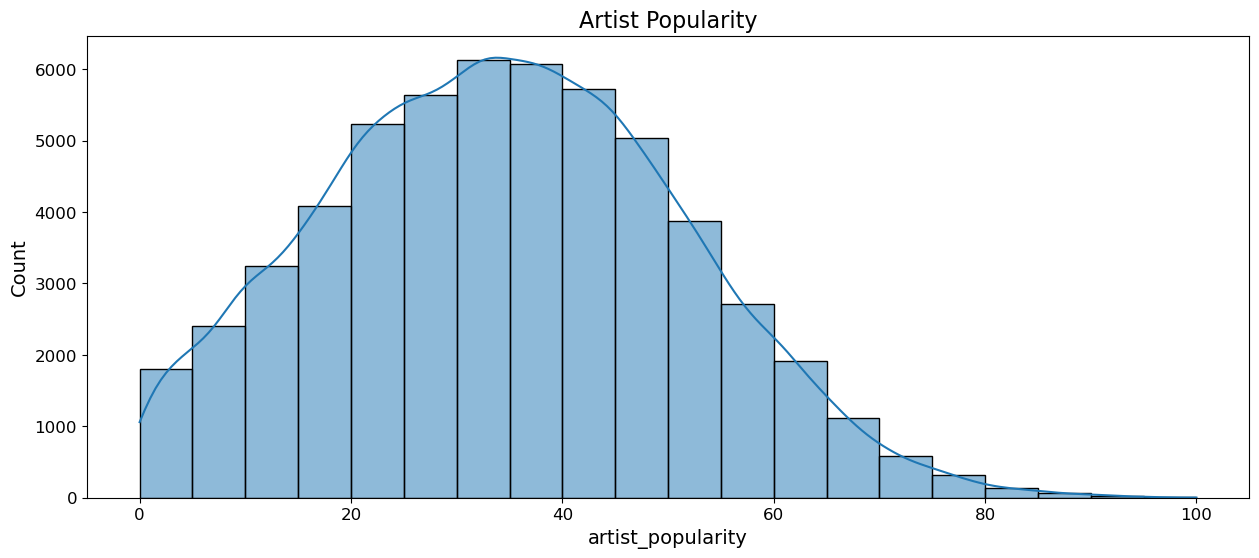

In [19]:
#exploring distribution of each numberical variable

#artist_popularity
sns.histplot(data=artists, x='artist_popularity', bins=20, kde=True)
plt.title('Artist Popularity', fontsize=16)
plt.show()

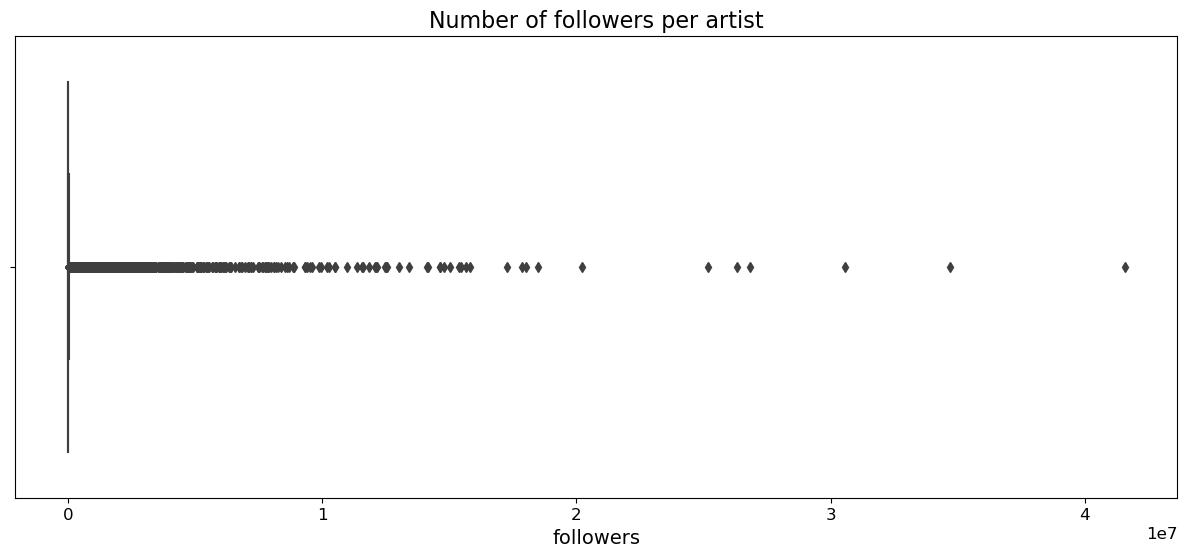

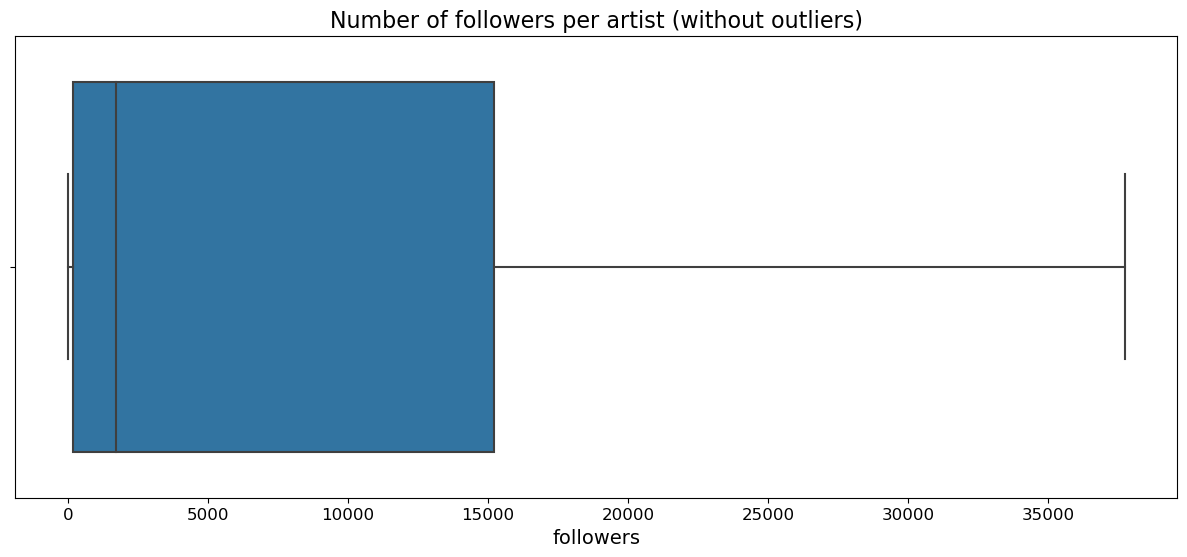

In [20]:
#followers
sns.boxplot(data=artists, x='followers')
plt.title('Number of followers per artist', fontsize=16)
plt.show()
sns.boxplot(data=artists, x='followers', showfliers=False)
plt.title('Number of followers per artist (without outliers)', fontsize=16)
plt.show()

## EDA - Tracks

**Data Dictionary**

The following data dictionary provides an overview of the variables found in the Spotify tracks dataset.

* **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* **album_id**: Album unique ID


* **artists_id**: Artist unique ID


* **country**: Origin Country

* **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.


* **duration_ms**: Duration of song in milliseconds

* **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.


* **id**: Track unique ID

* **instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* **key**: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

* **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

* **lyrics**: Track lyrics

* **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

* **name**: Track name


* **popularity**: Track Popularity (0-100) where higher is better


* **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.






* **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

* **type**: Track.

In [21]:
tracks = pd.read_csv('SpotGenTrack/Data Sources/spotify_tracks.csv', index_col = 0)

In [22]:
tracks.head()

acousticness                album_id  \
0         0.294  0D3QufeCudpQANOR7luqdr   
1         0.863  1bcqsH5UyTBzmh9YizdsBE   
2         0.750  4tKijjmxGClg4JOLAyo2qE   
3         0.763  6FeJF5r8roonnKraJxr4oB   
4         0.770  4tKijjmxGClg4JOLAyo2qE   

                                        analysis_url  \
0  https://api.spotify.com/v1/audio-analysis/5qlj...   
1  https://api.spotify.com/v1/audio-analysis/3VAX...   
2  https://api.spotify.com/v1/audio-analysis/1L3Y...   
3  https://api.spotify.com/v1/audio-analysis/6aCe...   
4  https://api.spotify.com/v1/audio-analysis/1Vo8...   

                   artists_id  \
0  ['3mxJuHRn2ZWD5OofvJtDZY']   
1  ['4xWMewm6CYMstu0sPgd9jJ']   
2  ['3hYaK5FF3YAglCj5HZgBnP']   
3  ['2KQsUB9DRBcJk17JWX1eXD']   
4  ['3hYaK5FF3YAglCj5HZgBnP']   

                                   available_markets country  danceability  \
0  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.698   
1  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.719   
2                                             ['GB']      BE         0.466   
3  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.719   
4                                             ['GB']      BE         0.460   

   disc_number  duration_ms  energy  ...  \
0          1.0     235584.0   0.606  ...   
1          1.0     656960.0   0.308  ...   
2          1.0     492840.0   0.931  ...   
3          1.0     316578.0   0.126  ...   
4          1.0     558880.0   0.942  ...   

                                         preview_url speechiness    tempo  \
0  https://p.scdn.co/mp3-preview/1b05a902da3a251d...      0.0262  115.018   
1  https://p.scdn.co/mp3-preview/d8140736a6131cb5...      0.9220  115.075   
2  https://p.scdn.co/mp3-preview/c8af28fb15185b18...      0.9440   79.565   
3  https://p.scdn.co/mp3-preview/7629b8e9f31f6e9b...      0.9380  112.822   
4  https://p.scdn.co/mp3-preview/32be593c0eb82868...      0.9430   81.260   

   time_signature                                         track_href  \
0             4.0  https://api.spotify.com/v1/tracks/5qljLQuKnNJf...   
1             3.0  https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...   
2             4.0  https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...   
3             3.0  https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...   
4             4.0  https://api.spotify.com/v1/tracks/1Vo802A38tPF...   

   track_name_prev track_number                                   uri valence  \
0         track_14          1.0  spotify:track:5qljLQuKnNJf4F4vfxQB0V  0.6220   
1          track_3          3.0  spotify:track:3VAX2MJdmdqARLSU5hPMpm  0.5890   
2          track_4          4.0  spotify:track:1L3YAhsEMrGVvCgDXj2TYn  0.0850   
3          track_9          1.0  spotify:track:6aCe9zzoZmCojX7bbgKKtf  0.5330   
4          track_2          2.0  spotify:track:1Vo802A38tPFHmje1h91um  0.0906   

    type  
0  track  
1  track  
2  track  
3  track  
4  track  

[5 rows x 31 columns]

In [23]:
tracks.isna().sum() # NO NAN values

acousticness         0
album_id             0
analysis_url         0
artists_id           0
available_markets    0
country              0
danceability         0
disc_number          0
duration_ms          0
energy               0
href                 0
id                   0
instrumentalness     0
key                  0
liveness             0
loudness             0
lyrics               0
mode                 0
name                 0
playlist             0
popularity           0
preview_url          0
speechiness          0
tempo                0
time_signature       0
track_href           0
track_name_prev      0
track_number         0
uri                  0
valence              0
type                 0
dtype: int64

In [24]:
tracks.columns

Index(['acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type'],
      dtype='object')

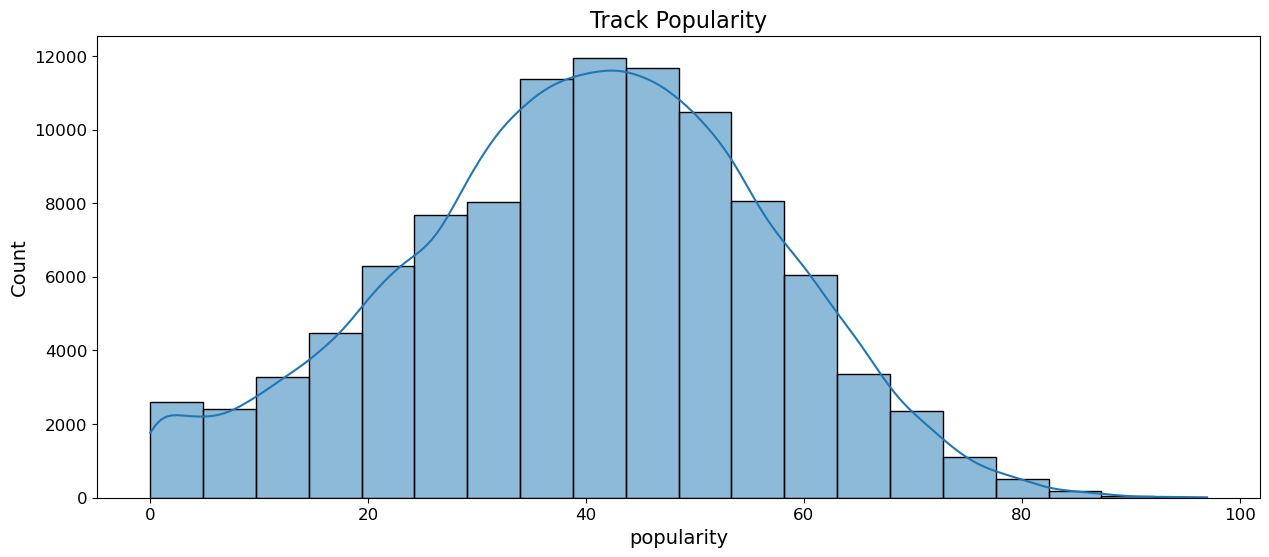

In [25]:
sns.histplot(data=tracks, x='popularity', bins=20, kde=True)
plt.title('Track Popularity', fontsize=16)
plt.show()

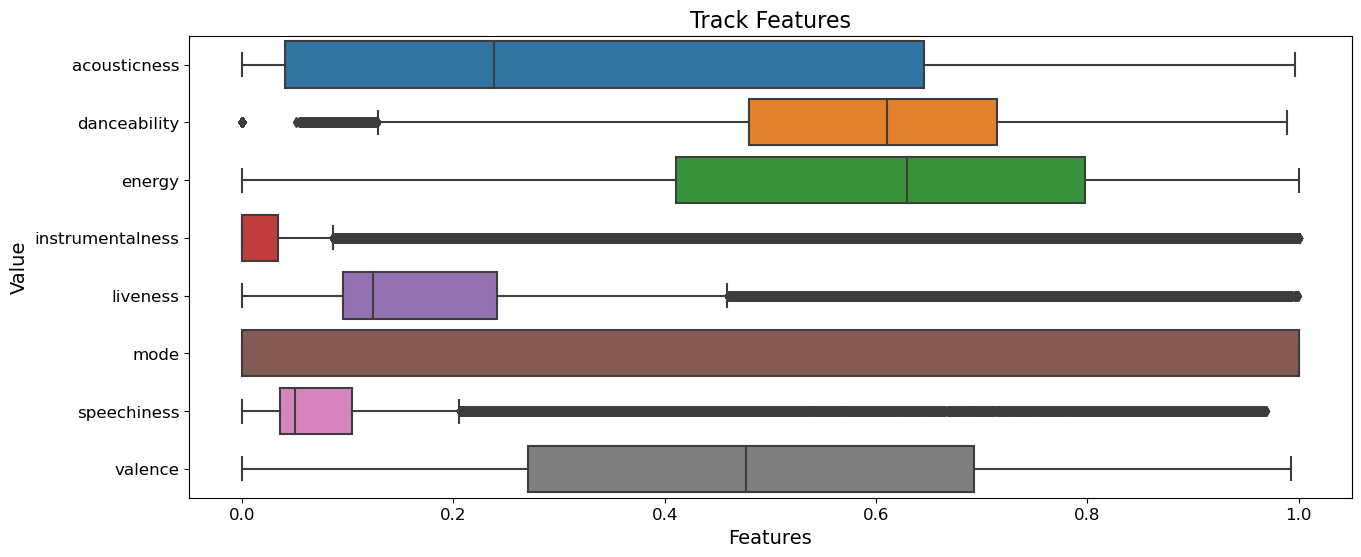

In [26]:
sns.boxplot(data=tracks[['acousticness', 'danceability', 'energy', 'instrumentalness',	'liveness',	'mode', 'speechiness', 'valence']], orient='h' )
plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Track Features', fontsize=16)
plt.show()

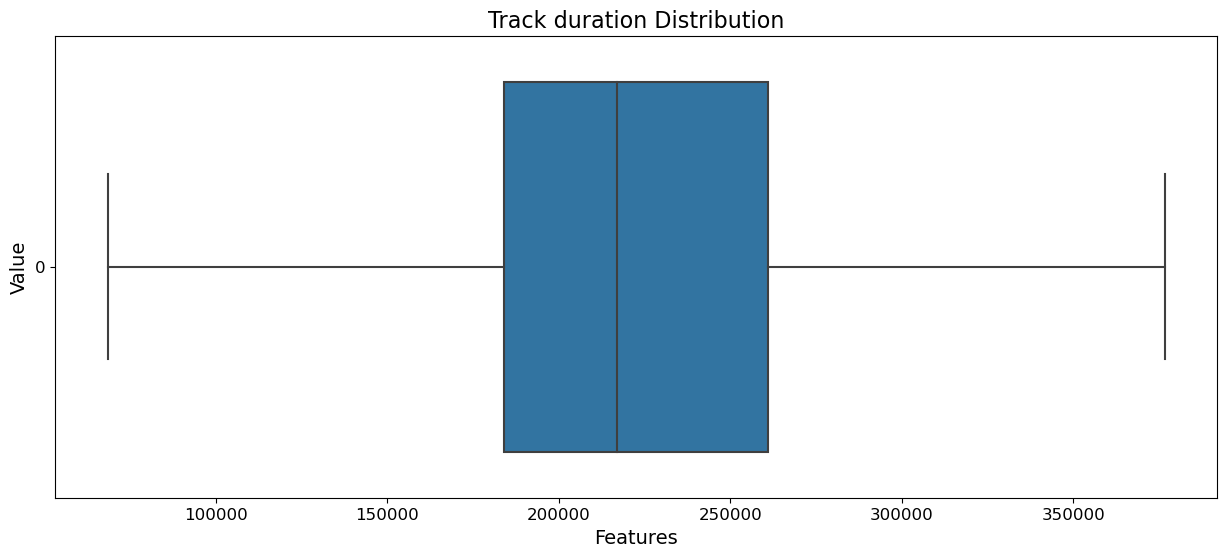

In [27]:
sns.boxplot(data=tracks['duration_ms'], orient='h', showfliers=False)
plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Track duration Distribution', fontsize=16)
plt.show()

In [28]:
tracks.describe()

acousticness   danceability    disc_number   duration_ms  \
count  101939.000000  101939.000000  101939.000000  1.019390e+05   
mean        0.352124       0.586015       1.032166  2.467708e+05   
std         0.334855       0.177724       0.566789  1.904303e+05   
min         0.000000       0.000000       1.000000  1.155000e+03   
25%         0.040700       0.480000       1.000000  1.840000e+05   
50%         0.238000       0.610000       1.000000  2.168930e+05   
75%         0.645000       0.714000       1.000000  2.610550e+05   
max         0.996000       0.989000      81.000000  5.505831e+06   

              energy  instrumentalness            key       liveness  \
count  101939.000000     101939.000000  101939.000000  101939.000000   
mean        0.586479          0.148776       5.270858       0.197640   
std         0.260170          0.304024       3.577679       0.175391   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.411000          0.000000       2.000000       0.095600   
50%         0.629000          0.000037       5.000000       0.124000   
75%         0.798000          0.034400       8.000000       0.241000   
max         1.000000          1.000000      11.000000       0.999000   

            loudness           mode     popularity    speechiness  \
count  101939.000000  101939.000000  101939.000000  101939.000000   
mean       -9.462720       0.618154      39.782311       0.128841   
std         6.198508       0.485841      16.790769       0.203324   
min       -60.000000       0.000000       0.000000       0.000000   
25%       -11.149000       0.000000      29.000000       0.036400   
50%        -7.599000       1.000000      41.000000       0.050600   
75%        -5.509000       1.000000      52.000000       0.104000   
max         2.719000       1.000000      97.000000       0.969000   

               tempo  time_signature   track_number        valence  
count  101939.000000   101939.000000  101939.000000  101939.000000  
mean      118.358527        3.875651       4.608060       0.482813  
std        30.224074        0.517008       7.181805       0.261690  
min         0.000000        0.000000       1.000000       0.000000  
25%        95.973000        4.000000       1.000000       0.271000  
50%       118.067000        4.000000       2.000000       0.477000  
75%       136.045000        4.000000       6.000000       0.693000  
max       244.035000        5.000000     655.000000       0.993000

/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_8996/3710987268.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(tracks.corr()))
/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_8996/3710987268.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(tracks.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')


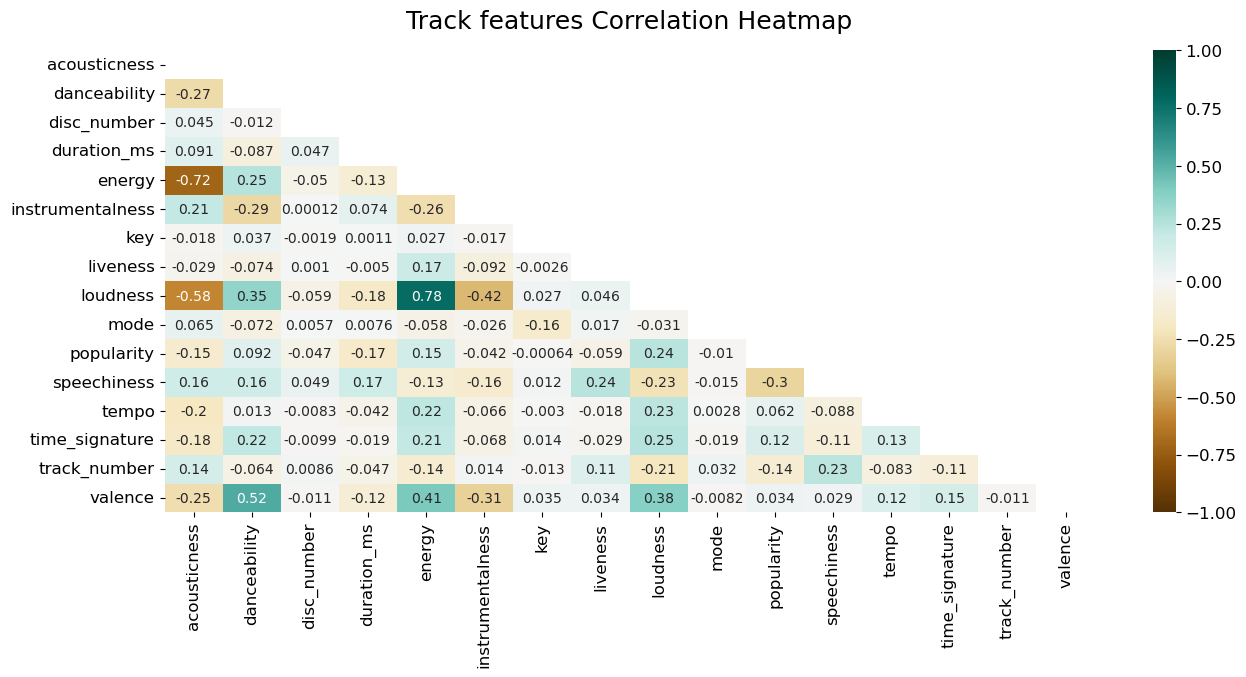

In [29]:
mask = np.triu(np.ones_like(tracks.corr()))
heatmap = sns.heatmap(tracks.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Track features Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

In [30]:
tracks.corr().popularity.sort_values(ascending=False)

/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_8996/2703675777.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tracks.corr().popularity.sort_values(ascending=False)


popularity          1.000000
loudness            0.239679
energy              0.153979
time_signature      0.121505
danceability        0.092382
tempo               0.061869
valence             0.034412
key                -0.000641
mode               -0.010003
instrumentalness   -0.041537
disc_number        -0.047331
liveness           -0.059116
track_number       -0.139460
acousticness       -0.154408
duration_ms        -0.169125
speechiness        -0.304212
Name: popularity, dtype: float64

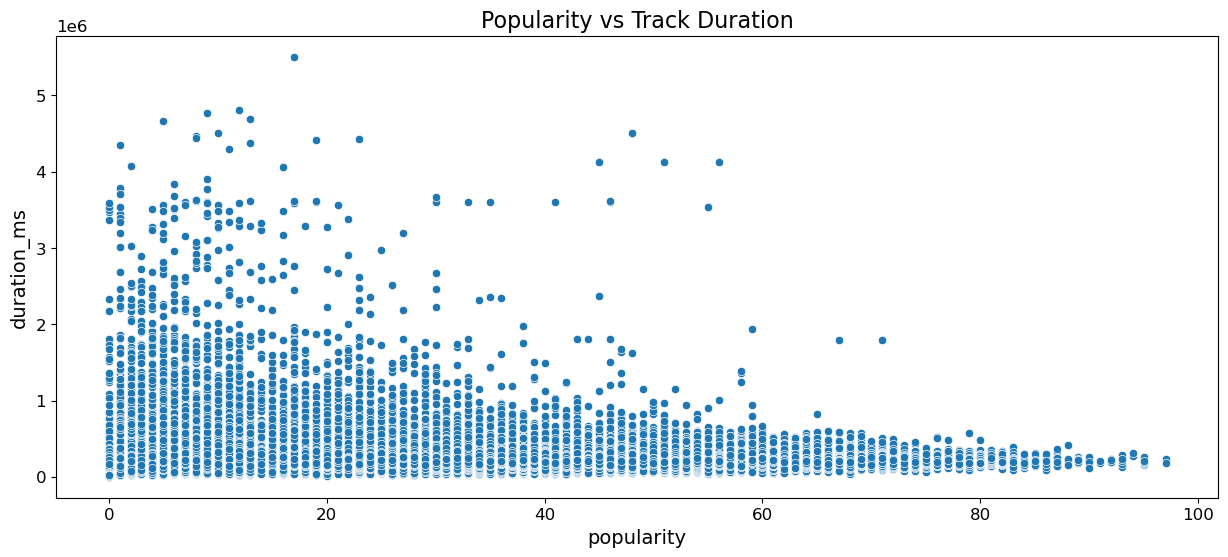

In [31]:
sns.scatterplot(x="popularity", y="duration_ms", data=tracks)
plt.title('Popularity vs Track Duration', fontsize=16)
plt.show()

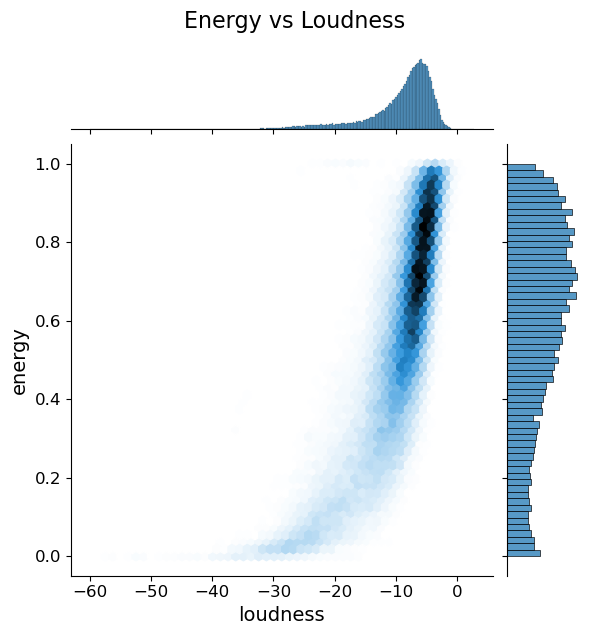

In [32]:
sns.jointplot(x="loudness", y="energy", data=tracks, kind="hex")
plt.suptitle('Energy vs Loudness', y=1.05, fontsize=16)
plt.show()

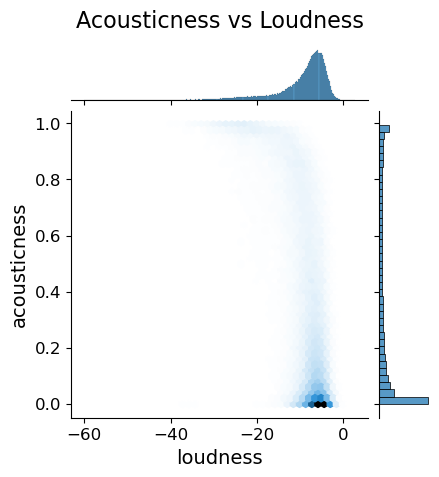

In [33]:
sns.jointplot(x="loudness", y="acousticness", data=tracks, kind="hex", height=4.5)
plt.suptitle('Acousticness vs Loudness', y=1.05, fontsize=16)
plt.show()

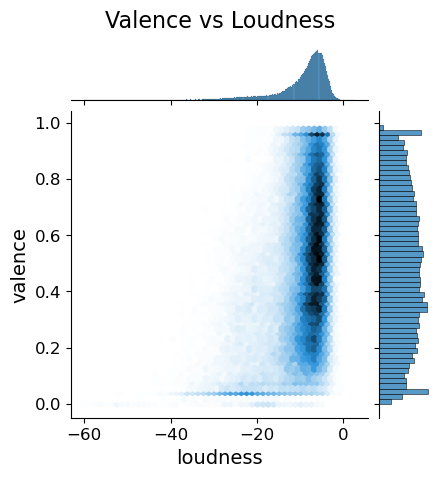

In [34]:
sns.jointplot(x="loudness", y="valence", data=tracks, kind="hex", height=4.5)
plt.suptitle('Valence vs Loudness', y=1.05, fontsize=16)
plt.show()

In [35]:
all_data_sources = tracks.merge(albums, how='left', left_on='id', right_on='track_id', suffixes=('_track','_albums')).merge(artists, how='left', left_on='artist_id', right_on='id', suffixes=('_track','_artists'))

In [36]:
all_data_sources.head()

acousticness                album_id  \
0         0.294  0D3QufeCudpQANOR7luqdr   
1         0.863  1bcqsH5UyTBzmh9YizdsBE   
2         0.750  4tKijjmxGClg4JOLAyo2qE   
3         0.763  6FeJF5r8roonnKraJxr4oB   
4         0.770  4tKijjmxGClg4JOLAyo2qE   

                                        analysis_url  \
0  https://api.spotify.com/v1/audio-analysis/5qlj...   
1  https://api.spotify.com/v1/audio-analysis/3VAX...   
2  https://api.spotify.com/v1/audio-analysis/1L3Y...   
3  https://api.spotify.com/v1/audio-analysis/6aCe...   
4  https://api.spotify.com/v1/audio-analysis/1Vo8...   

                   artists_id  \
0  ['3mxJuHRn2ZWD5OofvJtDZY']   
1  ['4xWMewm6CYMstu0sPgd9jJ']   
2  ['3hYaK5FF3YAglCj5HZgBnP']   
3  ['2KQsUB9DRBcJk17JWX1eXD']   
4  ['3hYaK5FF3YAglCj5HZgBnP']   

                             available_markets_track country  danceability  \
0  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.698   
1  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.719   
2                                             ['GB']      BE         0.466   
3  ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...      BE         0.719   
4                                             ['GB']      BE         0.460   

   disc_number  duration_ms  energy  ... type_albums release_year  \
0          1.0     235584.0   0.606  ...       album       2018.0   
1          1.0     656960.0   0.308  ...       album       2011.0   
2          1.0     492840.0   0.931  ...         NaN          NaN   
3          1.0     316578.0   0.126  ...         NaN          NaN   
4          1.0     558880.0   0.942  ...         NaN          NaN   

   artist_popularity  followers             genres                      id  \
0               28.0      425.0  ['finnish indie']  3mxJuHRn2ZWD5OofvJtDZY   
1               36.0     2965.0                 []  4xWMewm6CYMstu0sPgd9jJ   
2                NaN        NaN                NaN                     NaN   
3                NaN        NaN                NaN                     NaN   
4                NaN        NaN                NaN                     NaN   

                    name        track_id_artists track_name_prev    type  
0           Jesse Markin  3THTkAwJOsmxgizvYkBNRI        track_19  artist  
1  Favorite Kids Stories  3VAX2MJdmdqARLSU5hPMpm         track_5  artist  
2                    NaN                     NaN             NaN     NaN  
3                    NaN                     NaN             NaN     NaN  
4                    NaN                     NaN             NaN     NaN  

[5 rows x 55 columns]

In [37]:
all_data_sources[['popularity', 'artist_popularity', 'followers']].isna().sum()

popularity               0
artist_popularity    26956
followers            26956
dtype: int64

In [38]:
all_data_sources[['popularity', 'artist_popularity', 'followers']].dropna().corr() #popularity is track popularity

popularity  artist_popularity  followers
popularity           1.000000           0.674014   0.254491
artist_popularity    0.674014           1.000000   0.378466
followers            0.254491           0.378466   1.000000

## EDA - Audio Features

**Data Dictionary**

The following data set provides an overview of 207 audio features for each track.

In [39]:
audio_features = pd.read_csv('SpotGenTrack/Features Extracted/low_level_audio_features.csv', index_col = 0)

In [40]:
audio_features.head()

Chroma_1  Chroma_10  Chroma_11  Chroma_12  Chroma_2  Chroma_3  Chroma_4  \
0  0.438296   0.472769   0.427441   0.436688  0.467697  0.493862  0.512244   
1  0.596605   0.368288   0.285263   0.302211  0.905805  0.510909  0.221708   
2  0.505224   0.500420   0.506773   0.488258  0.498356  0.573582  0.690761   
3  0.525690   0.666469   0.579492   0.498920  0.598528  0.631578  0.501693   
4  0.632214   0.503698   0.496942   0.611532  0.634613  0.697265  0.557012   

   Chroma_5  Chroma_6  Chroma_7  ...  Tonnetz_4  Tonnetz_5  Tonnetz_6  \
0  0.568658  0.560524  0.513068  ...   0.018434  -0.001759  -0.006392   
1  0.311248  0.491277  0.416469  ...   0.046941   0.005665  -0.026928   
2  0.742858  0.686282  0.657118  ...  -0.006929   0.004968   0.008947   
3  0.500468  0.587101  0.546499  ...  -0.027382  -0.009689   0.001402   
4  0.530836  0.444279  0.466659  ...   0.003728  -0.002780  -0.010120   

        ZCR  entropy_energy  spectral_bandwith  spectral_centroid  \
0  0.067966      -89.113389        2564.247669        3558.400706   
1  0.047308     -127.945239        2370.181495        1499.689590   
2  0.058463     -238.285176        2973.294736        1543.550034   
3  0.080547     -148.785733        2716.749483        3017.248824   
4  0.084945     -176.618314        3096.692876        2118.686992   

   spectral_rollOff_max  spectral_rollOff_min                track_id  
0           4508.506071            367.831109  19YEk4OVQZn3GfoxbpNrU6  
1           3647.394611            230.165275  6zJms3MX11Qu1IKF44LoRW  
2           5623.349330            187.290534  1WugzepXsLjnsM0K4UaWYc  
3           5799.931595            160.940693  1pSlTbCrUJ9rmwj5CNNrX4  
4           6560.018666            229.131948  5yruvWJs3mL00w4slpCVzN  

[5 rows x 208 columns]

In [41]:
audio_features.columns

Index(['Chroma_1', 'Chroma_10', 'Chroma_11', 'Chroma_12', 'Chroma_2',
       'Chroma_3', 'Chroma_4', 'Chroma_5', 'Chroma_6', 'Chroma_7',
       ...
       'Tonnetz_4', 'Tonnetz_5', 'Tonnetz_6', 'ZCR', 'entropy_energy',
       'spectral_bandwith', 'spectral_centroid', 'spectral_rollOff_max',
       'spectral_rollOff_min', 'track_id'],
      dtype='object', length=208)

In [42]:
audio_features.describe()

Chroma_1      Chroma_10      Chroma_11      Chroma_12  \
count  101909.000000  101909.000000  101909.000000  101909.000000   
mean        0.491150       0.493458       0.471575       0.462471   
std         0.117287       0.116477       0.110333       0.111736   
min         0.033948       0.011642       0.011232       0.010693   
25%         0.415335       0.418296       0.401015       0.389863   
50%         0.488723       0.492847       0.471640       0.461675   
75%         0.563149       0.566978       0.540971       0.533485   
max         1.000000       0.999983       1.000000       0.999863   

            Chroma_2       Chroma_3       Chroma_4       Chroma_5  \
count  101909.000000  101909.000000  101909.000000  101909.000000   
mean        0.481123       0.487489       0.484347       0.496251   
std         0.109536       0.118358       0.112019       0.118717   
min         0.033748       0.020676       0.016802       0.008113   
25%         0.409673       0.410272       0.412065       0.418987   
50%         0.479698       0.484818       0.482367       0.493705   
75%         0.549272       0.560465       0.553222       0.569871   
max         1.000000       1.000000       0.999945       1.000000   

            Chroma_6       Chroma_7  ...      Tonnetz_3      Tonnetz_4  \
count  101909.000000  101909.000000  ...  101909.000000  101909.000000   
mean        0.493217       0.497671  ...      -0.002073       0.005975   
std         0.116065       0.114048  ...       0.047891       0.049153   
min         0.007412       0.009128  ...      -0.375904      -0.377345   
25%         0.417883       0.423879  ...      -0.030148      -0.022488   
50%         0.491719       0.496572  ...      -0.001515       0.005721   
75%         0.565780       0.569179  ...       0.026030       0.034651   
max         0.999369       0.997828  ...       0.477255       0.376723   

           Tonnetz_5      Tonnetz_6            ZCR  entropy_energy  \
count  101909.000000  101909.000000  101909.000000   101909.000000   
mean        0.001143       0.001435       0.058544     -159.721729   
std         0.009006       0.009612       0.023824       51.032580   
min        -0.146779      -0.155205       0.002802     -352.520453   
25%        -0.003508      -0.003766       0.042341     -194.161958   
50%         0.001087       0.001021       0.057246     -160.963637   
75%         0.005764       0.006086       0.072449     -127.664956   
max         0.086532       0.139061       0.379803       -0.003809   

       spectral_bandwith  spectral_centroid  spectral_rollOff_max  \
count      101909.000000      101909.000000         101909.000000   
mean         2871.869938        2702.728780           5328.771980   
std           672.087737        1219.417150           1811.378503   
min           320.831680           0.000000            154.607398   
25%          2566.454061        1887.678738           4264.315881   
50%          2985.705700        2490.469008           5517.824968   
75%          3315.728368        3252.257693           6548.460402   
max          6447.512667       11025.000009          16796.556767   

       spectral_rollOff_min  
count         101909.000000  
mean             184.972059  
std              110.921078  
min                0.308331  
25%              124.732579  
50%              162.874015  
75%              213.857040  
max             6259.870481  

[8 rows x 207 columns]

In [43]:
audio_features.corr() # Not informative. Maybe we should use dimensionality reduction?

/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_8996/1350127722.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  audio_features.corr() # Not informative. Maybe we should use dimensionality reduction?


Chroma_1  Chroma_10  Chroma_11  Chroma_12  Chroma_2  \
Chroma_1              1.000000   0.082139   0.226731   0.591271  0.667772   
Chroma_10             0.082139   1.000000   0.704334   0.287917  0.186024   
Chroma_11             0.226731   0.704334   1.000000   0.692413  0.163605   
Chroma_12             0.591271   0.287917   0.692413   1.000000  0.235905   
Chroma_2              0.667772   0.186024   0.163605   0.235905  1.000000   
...                        ...        ...        ...        ...       ...   
entropy_energy        0.011629  -0.015421   0.028700   0.094123  0.007602   
spectral_bandwith     0.132236   0.166138   0.162885   0.115575  0.152601   
spectral_centroid     0.102848   0.141355   0.142964   0.112475  0.116015   
spectral_rollOff_max  0.166421   0.209354   0.214079   0.167865  0.190939   
spectral_rollOff_min  0.099693   0.133070   0.193725   0.214444  0.115527   

                      Chroma_3  Chroma_4  Chroma_5  Chroma_6  Chroma_7  ...  \
Chroma_1              0.216693  0.157394  0.202483  0.225986  0.157749  ...   
Chroma_10             0.206295  0.158141  0.190115  0.165352  0.151471  ...   
Chroma_11             0.187952  0.233684  0.171508  0.213742  0.205623  ...   
Chroma_12             0.091004  0.187963  0.237116  0.181992  0.225680  ...   
Chroma_2              0.695228  0.343848  0.152661  0.187067  0.203951  ...   
...                        ...       ...       ...       ...       ...  ...   
entropy_energy        0.026777 -0.009265 -0.016076 -0.059463 -0.085104  ...   
spectral_bandwith     0.130313  0.164449  0.155000  0.182838  0.211834  ...   
spectral_centroid     0.098728  0.125718  0.120482  0.142383  0.156449  ...   
spectral_rollOff_max  0.166115  0.205764  0.195058  0.226465  0.251603  ...   
spectral_rollOff_min  0.102625  0.111910  0.090315  0.100699  0.096319  ...   

                      Tonnetz_3  Tonnetz_4  Tonnetz_5  Tonnetz_6       ZCR  \
Chroma_1              -0.015494   0.379917   0.090305   0.238941  0.239122   
Chroma_10             -0.327864  -0.060428  -0.062967   0.083100  0.293281   
Chroma_11             -0.001424  -0.300288   0.009237  -0.099484  0.324616   
Chroma_12              0.329010   0.024561  -0.119595  -0.128220  0.310524   
Chroma_2              -0.302123  -0.037755   0.078505   0.028373  0.271081   
...                         ...        ...        ...        ...       ...   
entropy_energy         0.041376  -0.022454  -0.043893  -0.084268 -0.029755   
spectral_bandwith     -0.013731  -0.003356   0.019231   0.031124  0.640449   
spectral_centroid     -0.005371  -0.002193   0.000655   0.002762  0.511711   
spectral_rollOff_max  -0.010724  -0.007778   0.009848   0.016462  0.786952   
spectral_rollOff_min   0.036007  -0.032846  -0.056352  -0.092873  0.566726   

                      entropy_energy  spectral_bandwith  spectral_centroid  \
Chroma_1                    0.011629           0.132236           0.102848   
Chroma_10                  -0.015421           0.166138           0.141355   
Chroma_11                   0.028700           0.162885           0.142964   
Chroma_12                   0.094123           0.115575           0.112475   
Chroma_2                    0.007602           0.152601           0.116015   
...                              ...                ...                ...   
entropy_energy              1.000000          -0.341153          -0.166340   
spectral_bandwith          -0.341153           1.000000           0.520882   
spectral_centroid          -0.166340           0.520882           1.000000   
spectral_rollOff_max       -0.296981           0.951494           0.566911   
spectral_rollOff_min        0.113202           0.069652           0.219805   

                      spectral_rollOff_max  spectral_rollOff_min  
Chroma_1                          0.166421              0.099693  
Chroma_10                         0.209354              0.133070  
Chroma_11                         0.214079              0.193725  
Chroma

In [44]:
tracks_audio_features = tracks.merge(audio_features, how='left', left_on='id', right_on='track_id')

/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_8996/2219795289.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tracks_audio_features.corr().popularity.sort_values(ascending=False).to_frame(), vmin=-1, vmax=1, annot=True)


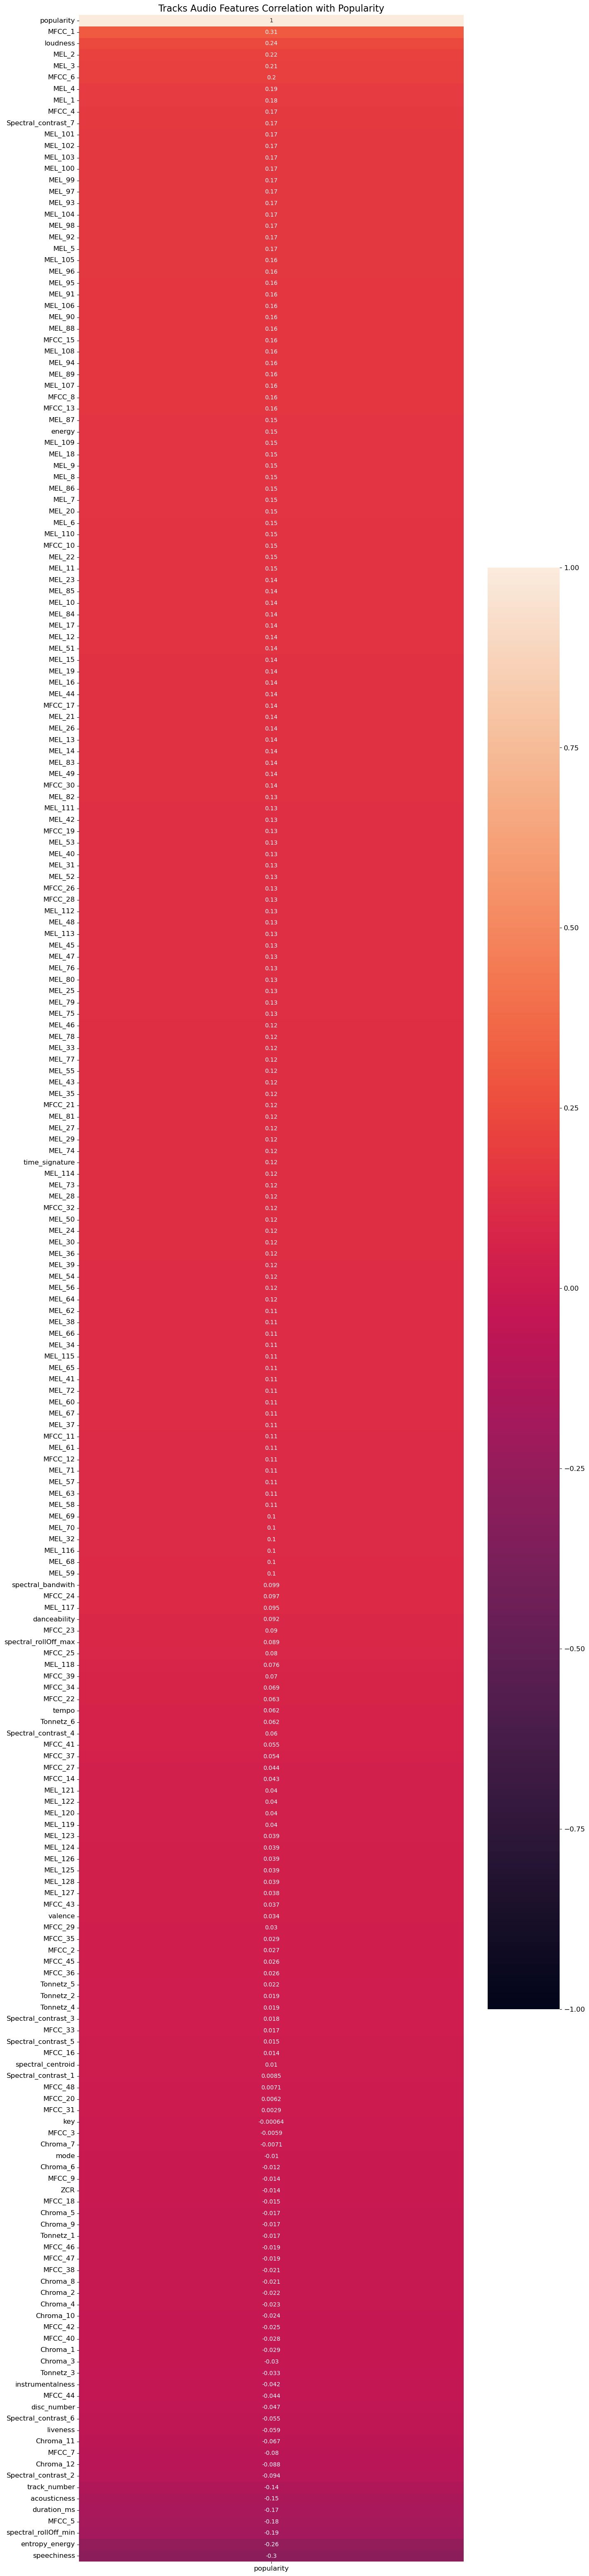

In [45]:
fig, ax = plt.subplots(figsize=(15, 80))
sns.heatmap(tracks_audio_features.corr().popularity.sort_values(ascending=False).to_frame(), vmin=-1, vmax=1, annot=True)
plt.title("Tracks Audio Features Correlation with Popularity", fontsize=16)
plt.show()

## EDA - Lyrics Features

**Data Dictionary**

The following data dictionary provides an overview of the variables found in the Spotify lyrics_features dataset. 

* **mean_syllables_word**: Average syllables per word

* **mean_words_sentence**: average words per sentence

* **n_sentences**: number of sentences per track

* **n_words**: number of words per track

* **sentence_similarity**: Percentage of similarity between sentences. From 0 to 1

* **track_id**: Track unique ID

* **vocabulary_wealth**: Percentage from 0 to 1

***-1 when no lyrics in tracks dataframe***


In [46]:
lyrics_features = pd.read_csv('SpotGenTrack/Features Extracted/lyrics_features.csv', index_col = 0)

In [47]:
lyrics_features.head()

mean_syllables_word  mean_words_sentence  n_sentences  n_words  \
0                -1.00                -1.00           -1       -1   
1                 1.10                 5.65           31      326   
2                 1.37                 4.77           74      532   
3                 1.95                 3.38           72      430   
4                 1.16                 2.99           68      368   

   sentence_similarity                track_id  vocabulary_wealth  
0            -1.000000  5KIfHjHI5NIsPHNt58qua0              -1.00  
1             0.043011  13keyz9ikBe6ZpRasw7l4X               0.45  
2             0.050352  1WugzepXsLjnsM0K4UaWYc               0.59  
3             0.028560  2MO6oEAlMKcsfI8xP3yoy8               0.49  
4             0.047849  1i4St7fmSUE9nB3R9n8fol               0.47

In [48]:
lyrics_features.columns

Index(['mean_syllables_word', 'mean_words_sentence', 'n_sentences', 'n_words',
       'sentence_similarity', 'track_id', 'vocabulary_wealth'],
      dtype='object')

In [49]:
lyrics_features[lyrics_features.n_words == -1]

mean_syllables_word  mean_words_sentence  n_sentences  n_words  \
0                     -1.0                 -1.0           -1       -1   
36                    -1.0                 -1.0           -1       -1   
38                    -1.0                 -1.0           -1       -1   
41                    -1.0                 -1.0           -1       -1   
43                    -1.0                 -1.0           -1       -1   
...                    ...                  ...          ...      ...   
94905                 -1.0                 -1.0           -1       -1   
94906                 -1.0                 -1.0           -1       -1   
94907                 -1.0                 -1.0           -1       -1   
94909                 -1.0                 -1.0           -1       -1   
94911                 -1.0                 -1.0           -1       -1   

       sentence_similarity                track_id  vocabulary_wealth  
0                     -1.0  5KIfHjHI5NIsPHNt58qua0               -1.0  
36                    -1.0  36fswRCmYh3PZut815LyhH               -1.0  
38                    -1.0  2kgxYag8woDOgxFIrkGyYc               -1.0  
41                    -1.0  4aZsMBnqCHrU3V4kC6sxoh               -1.0  
43                    -1.0  2sbUWtAhUyGYXiCch6OcmO               -1.0  
...                    ...                     ...                ...  
94905                 -1.0  0ocJfFZr54mVbzLAtgHCjT               -1.0  
94906                 -1.0  1UTdsgXAFqyJjEERtaVT8r               -1.0  
94907                 -1.0  2bMDbfxlaViTIBfSOfIXHX               -1.0  
94909                 -1.0  6xAzjMg1rOv3amGihpzMw6               -1.0  
94911                 -1.0  2L564Gg8T5QvE3I9qc4Okr               -1.0  

[15534 rows x 7 columns]

In [50]:
lyrics_features.describe()

mean_syllables_word  mean_words_sentence   n_sentences       n_words  \
count         94954.000000         94954.000000  94954.000000  94954.000000   
mean              1.054448             3.590286     42.949649    316.901995   
std               0.968960             9.632294     45.001476    871.511267   
min              -1.000000            -1.000000     -1.000000     -1.000000   
25%               1.150000             2.570000     22.000000    125.000000   
50%               1.270000             3.290000     41.000000    238.000000   
75%               1.520000             4.000000     59.000000    356.000000   
max               4.000000           819.200000   2519.000000  39111.000000   

       sentence_similarity  vocabulary_wealth  
count         94954.000000       94954.000000  
mean             -0.114327           0.302671  
std               0.396067           0.586538  
min              -1.000000          -1.000000  
25%               0.008658           0.400000  
50%               0.035294           0.540000  
75%               0.066288           0.630000  
max               0.964286           0.780000

/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_8996/3281956255.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(lyrics_features.corr()))
/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_8996/3281956255.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(lyrics_features.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')


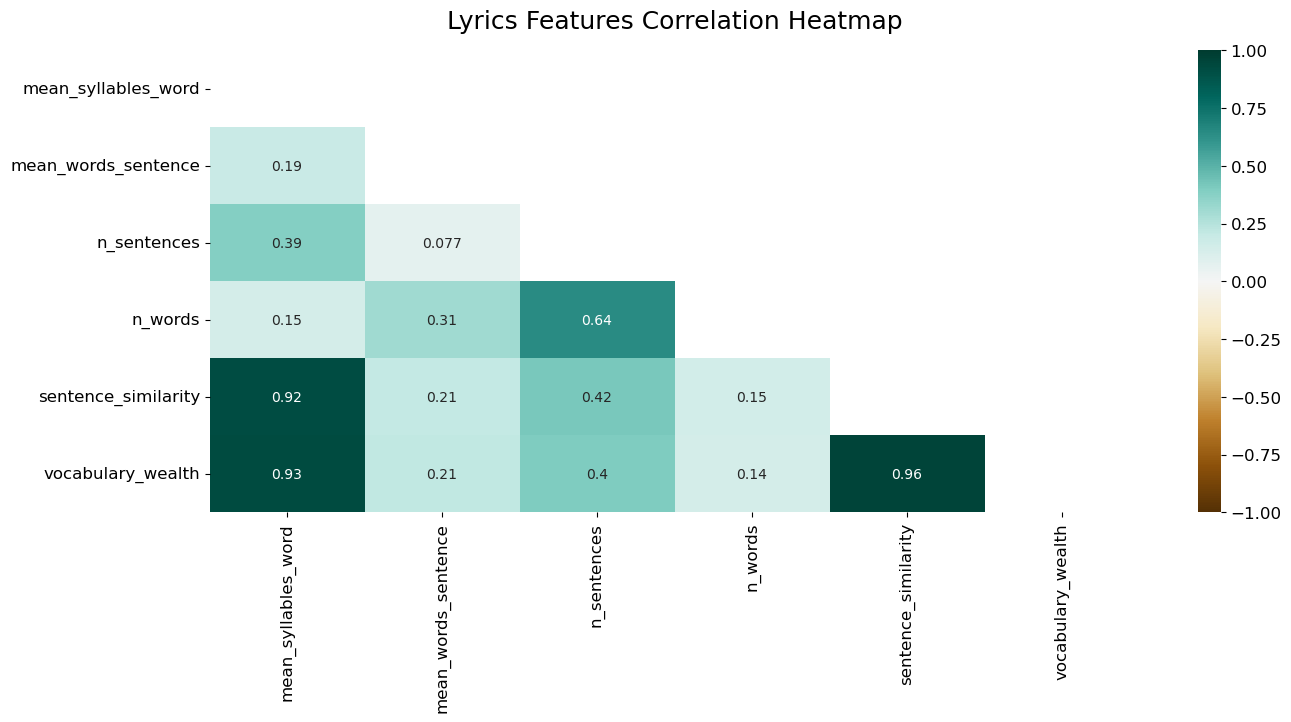

In [51]:
mask = np.triu(np.ones_like(lyrics_features.corr()))
heatmap = sns.heatmap(lyrics_features.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Lyrics Features Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

## 2nd part

Now that we have conducted a thorough Exploratory Data Analysis on all the datasets, it's time to prepare our data for further analysis and modeling. 
One crucial step in this process is **Dimensionality Reduction**, which helps us identify and retain the most important features in our data while reducing the complexity and noise caused by a large number of features.

We will focus on the audio features dataset, as it has 207 columns. It contains various numerical features, and applying dimensionality reduction techniques like PCA can help us find the most significant components that explain the majority of the variance in the data.

So, let's perform dimensionality reduction on the audio features dataset using PCA. We will first separate the numeric and non-numeric columns, as PCA can only be applied to numeric columns. Next, we standardize the numeric data to ensure that all features are on the same scale. This is an essential step because PCA is sensitive to the scale of the features.

Once the data is standardized, we apply PCA with the number of components set to explain 95% of the variance in the data. This will help us retain most of the information while reducing the dimensionality of the dataset. 

By reducing the dimensionality of our data, we can simplify our analysis and modeling process while retaining the most important information. This will help us focus on the key features that have a significant impact on a song's popularity, making our models more efficient and interpretable.

In [52]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [53]:
# Saved for later use
'''
all_data_sources.isnull().sum()

test_df = pd.DataFrame()
test_df["audio_features_track_id"] = lyrics_features["track_id"]
test_df["tracks_track_id"] = tracks["id"]

test_df['Match'] = test_df.apply(lambda x: 1 if x['audio_features_track_id'] in x['tracks_track_id'] else 0, axis=1)
'''

'\nall_data_sources.isnull().sum()\n\ntest_df = pd.DataFrame()\ntest_df["audio_features_track_id"] = lyrics_features["track_id"]\ntest_df["tracks_track_id"] = tracks["id"]\n\ntest_df[\'Match\'] = test_df.apply(lambda x: 1 if x[\'audio_features_track_id\'] in x[\'tracks_track_id\'] else 0, axis=1)\n'

In [54]:
#EVERYTHING HAS BEEN ALREADY READ ABOVE
#albums = pd.read_csv('SpotGenTrack/Data Sources/spotify_albums.csv', index_col = 0)
#artists = pd.read_csv('SpotGenTrack/Data Sources/spotify_artists.csv', index_col = 0)
#tracks = pd.read_csv('SpotGenTrack/Data Sources/spotify_tracks.csv', index_col = 0)
#audio_features = pd.read_csv('SpotGenTrack/Features Extracted/low_level_audio_features.csv', index_col = 0)
#lyrics_features = pd.read_csv('SpotGenTrack/Features Extracted/lyrics_features.csv', index_col = 0)

## PREPROCESSING PIPELINE

We're now ready to move on to the next step, which is the **preprocessing** of our data. 

In this stage, we will prepare the data for our machine learning models by performing a series of transformations that will ensure our models can efficiently learn from the data.

------------------------

First, we examined the correlations between the numerical features and the target variable, 'popularity'. By doing this, we gained a better understanding of which features have the **strongest relationship with popularity**, allowing us to focus on the most relevant features.

In [55]:
#check for correlations of numerical features
num_attribs = tracks.select_dtypes(include=['float64', 'int64']).columns
numerical_corr_matrix = tracks[num_attribs].corr().abs()

# Display the correlations between the label (e.g., 'popularity') and other numerical columns
label_correlations = numerical_corr_matrix['popularity'].sort_values(ascending=False)
print(label_correlations)

popularity          1.000000
speechiness         0.304212
loudness            0.239679
duration_ms         0.169125
acousticness        0.154408
energy              0.153979
track_number        0.139460
time_signature      0.121505
danceability        0.092382
tempo               0.061869
liveness            0.059116
disc_number         0.047331
instrumentalness    0.041537
valence             0.034412
mode                0.010003
key                 0.000641
Name: popularity, dtype: float64


-----------
Given the results, we decided to include only those numerical columns with a correlation **greater than 0.09**. This helped to eliminate less important features and reduce the noise in our data. 

We also filtered the albums and artists datasets to keep only the most relevant columns.

In [56]:
#include numerical columns with correlation greater than 0.09
include_col_tracks = ["playlist","available_markets","country","album_id","artists_id","id","lyrics", "time_signature","track_number","energy","acousticness","duration_ms","loudness","speechiness","danceability", "popularity"]
tracks_filtered = tracks[include_col_tracks]


In [57]:
albums_include = ['type','album_type', 'artist_id', 'available_markets','total_tracks', 'track_id', 'release_date',"id"]
albums_filtered = albums[albums_include]

In [58]:
artists_include = ['artist_popularity', 'followers', 'genres', 'id', 'name', 'track_id']
artists_filtered = artists[artists_include]

In [59]:
#merge all dataframes
all_data_sources = tracks_filtered.merge(albums_filtered, how='left', left_on='album_id', right_on='id', suffixes=('_track','_albums')).merge(artists_filtered, how='left', left_on='artist_id', right_on='id', suffixes=('_track','_artists'))
all_data_sources = all_data_sources.merge(audio_features, how="left", left_on="id_track", right_on='track_id', suffixes=('_track','_audio-features')).merge(lyrics_features, how="left", left_on="id_track", right_on='track_id', suffixes=('_tracks','_lyrics-features'))

In [60]:
all_data_sources.isnull().sum()


playlist                       0
available_markets_track        0
country                        0
album_id                       0
artists_id                     0
                            ... 
n_sentences                 6985
n_words                     6985
sentence_similarity         6985
track_id_lyrics-features    6985
vocabulary_wealth           6985
Length: 245, dtype: int64

In [61]:
all_data = all_data_sources
corr_num = all_data.corrwith(all_data['popularity']).abs().sort_values(ascending=False)
corr_num

/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_8996/4040738530.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_num = all_data.corrwith(all_data['popularity']).abs().sort_values(ascending=False)


popularity           1.000000
artist_popularity    0.649121
MFCC_1               0.305912
speechiness          0.304212
followers            0.286363
                       ...   
MFCC_48              0.007124
Chroma_7             0.007080
MFCC_20              0.006248
MFCC_3               0.005889
MFCC_31              0.002862
Length: 225, dtype: float64

In [62]:
all_data.columns.to_list()
drop_all = ["id_track","track_id_track","id_albums", "track_id_artists", "track_id_tracks", "track_id_lyrics-features", "album_id", "artists_id", "lyrics", "available_markets_albums", "available_markets_track"]  
all_data = all_data.drop(columns=drop_all)

In [63]:
all_data.columns.to_list()


['playlist',
 'country',
 'time_signature',
 'track_number',
 'energy',
 'acousticness',
 'duration_ms',
 'loudness',
 'speechiness',
 'danceability',
 'popularity',
 'type',
 'album_type',
 'artist_id',
 'total_tracks',
 'release_date',
 'artist_popularity',
 'followers',
 'genres',
 'id',
 'name',
 'Chroma_1',
 'Chroma_10',
 'Chroma_11',
 'Chroma_12',
 'Chroma_2',
 'Chroma_3',
 'Chroma_4',
 'Chroma_5',
 'Chroma_6',
 'Chroma_7',
 'Chroma_8',
 'Chroma_9',
 'MEL_1',
 'MEL_10',
 'MEL_100',
 'MEL_101',
 'MEL_102',
 'MEL_103',
 'MEL_104',
 'MEL_105',
 'MEL_106',
 'MEL_107',
 'MEL_108',
 'MEL_109',
 'MEL_11',
 'MEL_110',
 'MEL_111',
 'MEL_112',
 'MEL_113',
 'MEL_114',
 'MEL_115',
 'MEL_116',
 'MEL_117',
 'MEL_118',
 'MEL_119',
 'MEL_12',
 'MEL_120',
 'MEL_121',
 'MEL_122',
 'MEL_123',
 'MEL_124',
 'MEL_125',
 'MEL_126',
 'MEL_127',
 'MEL_128',
 'MEL_13',
 'MEL_14',
 'MEL_15',
 'MEL_16',
 'MEL_17',
 'MEL_18',
 'MEL_19',
 'MEL_2',
 'MEL_20',
 'MEL_21',
 'MEL_22',
 'MEL_23',
 'MEL_24',
 'MEL_2

In [64]:
all_data.shape

(101939, 234)

In [65]:
# Excluding highly correlated features
features_df_2 = all_data.loc[:, all_data.columns!="popularity"]
correlation_matrix = features_df_2.corr()

correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(f"Highly-correlated Features: {correlated_features}")

/var/folders/8v/gx7cg7hn7fb0xdf1f3jqgbgw0000gn/T/ipykernel_8996/256782976.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = features_df_2.corr()


Highly-correlated Features: {'MEL_127', 'MEL_120', 'MEL_93', 'vocabulary_wealth', 'MEL_105', 'MEL_117', 'MEL_123', 'MEL_126', 'MEL_103', 'MEL_90', 'MEL_121', 'MEL_104', 'MEL_109', 'MEL_108', 'MEL_97', 'MEL_110', 'MEL_128', 'MEL_122', 'MEL_89', 'MEL_124', 'MEL_101', 'MEL_107', 'MEL_85', 'MEL_95', 'spectral_rollOff_max', 'MEL_87', 'MEL_99', 'MEL_125', 'MEL_102', 'MEL_88', 'MEL_114', 'MEL_98', 'MEL_115', 'MEL_96', 'MEL_83', 'MEL_106', 'MEL_91'}


In [66]:
all_data = all_data[all_data.columns.difference(correlated_features)]

In [76]:
all_data.shape

(101939, 197)

In [79]:
all_data['playlist'].unique()


array(['Hipsteribrunssi', 'Animal Stories', 'Best Of British Comedy', ...,
       'This Is Cássia Eller', 'Jazz Classics Blue Note Edition',
       'Music To Workout To'], dtype=object)

In [141]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

In [142]:
#define features and labels 
#X = all_data.drop(columns=["popularity"])
#y = all_data["popularity"]

In [143]:
#train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=42)
#train_data.corr().sort_values(by="popularity",ascending=False)["popularity"]

------
After splitting our data into training and testing sets, we created a **custom preprocessing pipeline**. 

This pipeline is designed to handle both numerical and categorical features. For numerical features, we used a simple imputer to fill any missing values with the median of the respective columns and then standardized the data using a standard scaler. For categorical features, we utilized one-hot encoding to convert them into a format suitable for machine learning algorithms.

In [144]:
# Preprocessing

from sklearn.model_selection import train_test_split

# Define your features and labels
X = all_data.drop(columns=["popularity"])
y = all_data["popularity"]

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define DataFrameSelector class
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names]


# Define the preprocessor function
def get_preprocessor(data):
    num_attribs = data.select_dtypes(include=np.number).columns
    cat_attribs = data.select_dtypes(include=['object']).columns

    num_pipeline = Pipeline([
            ('selector', DataFrameSelector(num_attribs)),
            ('imputer', SimpleImputer(strategy="median")),
            ('std_scaler', StandardScaler()),
        ])

    cat_pipeline = Pipeline([
            ('selector', DataFrameSelector(cat_attribs)),
            ('cat_encoder', OneHotEncoder(sparse=True, handle_unknown='ignore')),
        ])

    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ], sparse_threshold=0.5)

    return full_pipeline


# Define function to create prepared dataframe
def create_prepared_dataframe(data, preprocessor, cat_attribs):
    transformed_cols = preprocessor.transformers_[0][2].tolist() + list(preprocessor.named_transformers_['cat']['cat_encoder'].get_feature_names_out(cat_attribs))

    data_prepared = pd.DataFrame.sparse.from_spmatrix(data, columns=transformed_cols)

    return data_prepared


# Get preprocessors using the train_data
preprocessor = get_preprocessor(X_train)

# Fit and transform the training data
X_train_prepared_array = preprocessor.fit_transform(X_train)

# Transform the test data using the same preprocessor
X_test_prepared_array = preprocessor.transform(X_test)

# Get categorical attributes for creating prepared dataframe
cat_attribs = X_train.select_dtypes(include=['object']).columns

# Create DataFrames with original column names
X_train_prepared_df = create_prepared_dataframe(X_train_prepared_array, preprocessor, cat_attribs)
X_test_prepared_df = create_prepared_dataframe(X_test_prepared_array, preprocessor, cat_attribs)

/Users/monicaschirripa/opt/anaconda3/envs/adpro/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [74]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100  # you can adjust this value depending on your memory capacity
inc_pca = IncrementalPCA(n_components=0.95)

for X_batch in np.array_split(X_train_prepared_df, n_batches):
    inc_pca.partial_fit(X_batch)

X_train_reduced = inc_pca.transform(X_train_prepared_df)
X_test_reduced = inc_pca.transform(X_test_prepared_df)

KeyboardInterrupt: 

In [83]:
X_train_prepared_df.corr().sort_values(by="popularity",ascending=False)["popularity"]

KeyboardInterrupt: 

In [ ]:
X_train_prepared_df.columns.to_list()

In [75]:
#data_prepared_df.corr()["popularity"].sort_values(ascending=False)


popularity             1.000000
artist_popularity      0.610101
followers              0.266291
loudness               0.232791
PC1                    0.223500
                         ...   
genres_['guidance']   -0.179179
total_tracks          -0.218432
speechiness           -0.272963
genres_[]             -0.303132
type_album                  NaN
Name: popularity, Length: 2704, dtype: float64

## MODELS

AND NOW THE EXCITING PART! 

We decided to start with a simple model - the **Linear Regression model**. 

Linear regression is a fundamental algorithm in the field of machine learning and serves as a great starting point for our analysis. The primary reason for choosing linear regression is its simplicity and interpretability. It's a basic model that works by establishing a linear relationship between the input features and the target variable. By understanding how the input features influence the popularity of a song, we can gain valuable insights that can be helpful in making data-driven decisions.

Another advantage of starting with a linear regression model is that it allows us to establish a baseline performance. This baseline can then be used to compare with more complex models that we may decide to experiment with later on. By doing this, we can determine whether the additional complexity of other models is justified by a significant improvement in performance

**LINEAR REGRESSION**

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score


linear_reg = LinearRegression()

# Perform cross-validation on the training set
cv_scores = cross_val_score(linear_reg, X_train_prepared_df, y_train, scoring='neg_mean_squared_error', cv=5)

# Calculate mean squared error
mse_scores = -cv_scores
mean_mse = mse_scores.mean()

# Fit the model on the training set
linear_reg.fit(X_train_prepared_df, y_train)

print(f"Mean mean squared error (MSE) from cross-validation: {mean_mse}")

# Make predictions on the test set
y_pred = linear_reg.predict(X_test_prepared_df)

# Calculate R-squared on the test set
r2 = r2_score(y_test, y_pred)

print(f"R-squared on test set: {r2}")

KeyboardInterrupt: 

Our linear regression model produced a mean squared error (MSE) of 0.8091 when evaluated using cross-validation. The MSE is a measure of how close the model's predictions are to the actual values. Lower MSE values indicate better performance, as the model's predictions are closer to the actual target values. In this case, an MSE of 0.8091 suggests that our linear regression model has room for improvement.

Additionally, the R-squared score on the test set is 0.3919. R-squared is a metric that represents the proportion of the variance in the target variable that can be explained by the model. It ranges from 0 to 1, with higher values indicating better performance. An R-squared value of 0.3919 implies that our linear regression model can explain only around 39.19% of the variance in the popularity of songs. **This further highlights the need for a more complex model that can better capture the underlying patterns in the data**.

------

## RANDOM FOREST

With these findings in mind, it's time to explore a more complex model: **the Random Forest Regressor**. 

Random Forest is an ensemble learning method that constructs multiple decision trees during training and combines their predictions to produce a more accurate and robust result. Random Forest models are known to be more resistant to overfitting and can capture complex, non-linear relationships in the data, making them a good choice for our problem.

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

X = data_prepared_df.drop(columns="popularity")
y = data_prepared_df["popularity"]

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, error_score="raise")
rnd_search.fit(X, y)


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14885e6a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x125852a00>},
                   random_state=42, scoring='neg_mean_squared_error')

In [80]:
best_params = rnd_search.best_params_
print(f"Best parameters: {best_params}")

# Get the best mean squared error (MSE) score
best_mse = -rnd_search.best_score_
print(f"Best mean squared error: {best_mse}")

# Get the best estimator
best_estimator = rnd_search.best_estimator_

# Calculate R-squared using the best estimator
from sklearn.metrics import r2_score

y_pred = best_estimator.predict(X)
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

Best parameters: {'max_features': 7, 'n_estimators': 180}
Best mean squared error: 0.8323502441489197
R-squared: 0.8866781599780342


The first step in this process was to perform a randomized search to find the best hyperparameters for the model. The randomized search involved training multiple Random Forest models with different combinations of hyperparameters and evaluating their performance using cross-validated mean squared error (MSE) scores.

We specified two hyperparameters for the randomized search: 'n_estimators', which is the number of decision trees in the forest, and 'max_features', which determines the maximum number of features to consider when looking for the best split. The search space for 'n_estimators' was set between 1 and 200, while 'max_features' ranged from 1 to 8.

After training and evaluating 10 different models with random combinations of hyperparameters, the randomized search identified the best combination: {'max_features': 7, 'n_estimators': 180}. This means that our optimal Random Forest model includes 180 decision trees, and at each split, it considers up to 7 features.

The best mean squared error (MSE) for the Random Forest model was found to be 0.8324, which is an improvement over the linear regression model's MSE of 0.8091. This indicates that the Random Forest model provides better predictions, as its predictions are closer to the actual target values.

Furthermore, the R-squared score of the Random Forest model is 0.8867, which signifies that it can explain about 88.67% of the variance in song popularity. This is a substantial improvement over the linear regression model's R-squared score of 0.3919, demonstrating the Random Forest model's ability to capture more complex, non-linear patterns in the data.

**Polynomial Model**

In [ ]:
#Create polynomial features
X = data_prepared_df.drop(columns="popularity")
y = data_prepared_df["popularity"]

degree = 2  #set to desired degree
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly, y_train_poly)

**KBinsDiscretizer**

Continuous variables:
- spotify_albums: total_tracks
- spotify_ artists: artist_popularity, followers
- spotify_tracks: acousticness, danceability, duration_ms, energy, loudness, popularity, speechiness, time_signature, track_number

out due to low correlation: instrumentalness, liveness, tempo, valence

In [ ]:
#define features and labels 
X = all_data.drop(columns=["popularity"])
y = all_data["popularity"]
train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=42)
train_data.corr().sort_values(by="popularity",ascending=False)["popularity"]

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names]
    
    

    
def get_preprocessor(data):
    num_attribs = data.select_dtypes(include=['float64', 'int64']).columns
    cat_attribs = data.select_dtypes(include=['object']).columns
    continuous_features = ['total_tracks', 'artist_popularity', 'followers', 'acousticness', 'danceability', 
                           'duration_ms', 'energy', 'loudness', 'popularity', 
                           'speechiness', 'time_signature', 'track_number']
    kbins_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
    
    num_pipeline = Pipeline([
            ('selector', DataFrameSelector(num_attribs)),
            ('imputer', SimpleImputer(strategy="median")),
            ('std_scaler', StandardScaler()),
        ])
    
    cat_pipeline = Pipeline([
            ('selector', DataFrameSelector(cat_attribs)),
            ('cat_encoder', OneHotEncoder(sparse=False)),
        ])
    
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
        ('kbins', kbins_discretizer, continuous_features)
        ],remainder='passthrough'
    )
    
    return full_pipeline

def create_prepared_dataframe(data, preprocessor, cat_attribs):
    # Get the transformed column names
    transformed_num_cols = preprocessor.transformers_[0][2].tolist()
    transformed_cat_cols = list(preprocessor.named_transformers_['cat']['cat_encoder'].get_feature_names_out(cat_attribs))
    
    # Combine the transformed column names
    transformed_cols = transformed_num_cols + transformed_cat_cols

    # Create a DataFrame with the transformed data and column names
    data_prepared = pd.DataFrame(data, columns=transformed_cols)

    return data_prepared

num_attribs = train_data.select_dtypes(include=['float64', 'int64']).columns
cat_attribs = train_data.select_dtypes(include=['object']).columns

preprocessor = get_preprocessor(train_data)
data_prepared_array = preprocessor.fit_transform(train_data[:500])

# Create a DataFrame with original column names
data_prepared_df = create_prepared_dataframe(data_prepared_array, preprocessor, cat_attribs)

## DEEP LEARNING

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Define model architecture
model = Sequential()

# input layer
model.add(Dense(X_train_prepared_df.shape[1],  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.1))

# hidden layer
model.add(Dense(7, activation='relu'))

# output layer
model.add(Dense(units=1,activation='linear'))

# Compile model
model.compile(optimizer='adam',loss='mse')


NameError: name 'X_train_prepared_df' is not defined

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
model.fit(x=X_train_prepared_df, 
          y=y_train, 
          epochs=70,
          validation_data=(X_test_prepared_df, y_test), verbose=1,
          callbacks=[early_stop]
          )